In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

# Make data

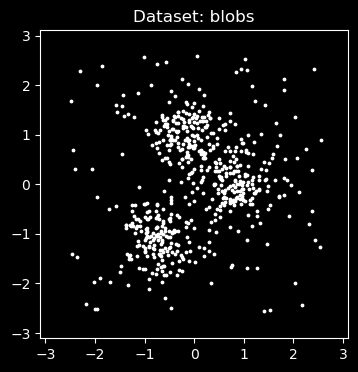

In [59]:
from sklearn.datasets import make_blobs, make_classification, make_moons, make_circles

dataset_type = 'blobs'  # try: blobs, classification, moons, circles, anisotropic, varied

if dataset_type == 'blobs':
    X1, _ = make_blobs(
        n_samples=500,
        centers=3,
        cluster_std=3,
        random_state=42
    )

elif dataset_type == 'classification':
    X1, _ = make_classification(
        n_samples=120,
        n_features=2,
        n_redundant=0,
        n_clusters_per_class=1,
        n_classes=3,
        class_sep=2,
        random_state=42
    )

elif dataset_type == 'moons':
    from sklearn.datasets import make_moons
    X1, _ = make_moons(
        n_samples=10,
        noise=0.1,
        random_state=42
    )

elif dataset_type == 'circles':
    from sklearn.datasets import make_circles
    X1, _ = make_circles(
        n_samples=500,
        noise=0.1,
        factor=0.1,
        random_state=42
    )

elif dataset_type == 'anisotropic':
    X1, _ = make_blobs(
        n_samples=120,
        centers=3,
        cluster_std=1,
        random_state=42
    )
    # Apply an anisotropic linear transformation
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    X1 = X1.dot(transformation)

elif dataset_type == 'varied':
    X1, _ = make_blobs(
        n_samples=120,
        centers=[[-5, -5], [0, 0], [5, 5]],
        cluster_std=[1.0, 2.5, 0.5],
        random_state=42
    )

else:
    raise ValueError("Unknown dataset_type")

# Normalize and add optional noise
n_noise = 100
X1 -= np.mean(X1, axis=0)
MAX = np.max(np.abs(X1))
X2 = np.random.uniform(-MAX, MAX, size=(n_noise, 2))

X = np.concatenate((X1, X2), axis=0)
X -= np.mean(X, axis=0)
X /= np.std(X)
MAX = np.max(np.abs(X)) * 1.2

# Plot
%matplotlib inline

plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c='w', s=3)
plt.xlim(-MAX, MAX)
plt.ylim(-MAX, MAX)
plt.gca().set_aspect('equal')
plt.title(f"Dataset: {dataset_type}")
plt.show()

# Perform DBSCAN w/ sklearn

Like agglomerative, you can't generalize the model to new data.

,-1,0,1,2
count,79,175,339,7


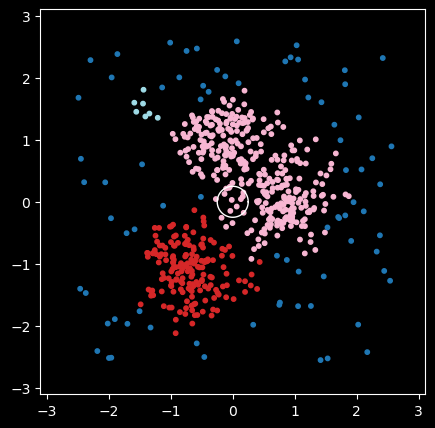

In [61]:
from sklearn.cluster import DBSCAN

radius      = 0.25
min_samples = 5

# Find clusters
model = DBSCAN(
    eps=radius,
    min_samples=min_samples
)
labels = model.fit_predict(X)

display(pd.DataFrame(pd.Series(labels).value_counts().sort_index()).T)

# Plot
cmap = 'tab20'

plt.figure(figsize=(5,5))

theta = np.linspace(0,2*np.pi,100)
c = radius * np.cos(theta)
s = radius * np.sin(theta)

plt.plot(c, s, linewidth=1, c='w')

plt.scatter(X[:,0], X[:,1], c=labels, s=10, cmap=cmap);
plt.xlim(-MAX,MAX)
plt.ylim(-MAX,MAX)
plt.gca().set_aspect('equal')
plt.show()

# Varying the radius

radius: 0.01


,-1
count,600


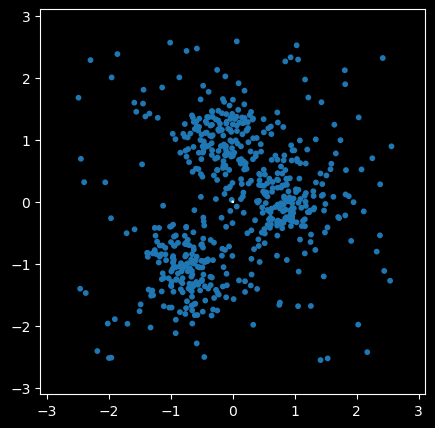

radius: 0.03591786732003153


,-1,0
count,595,5


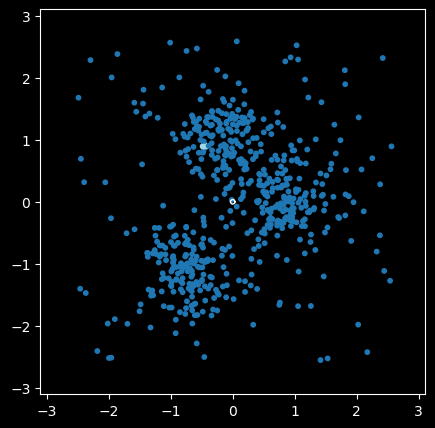

radius: 0.061835734640063054


,-1,0,1,2,3,4,5,6,7
count,554,6,8,5,5,7,5,5,5


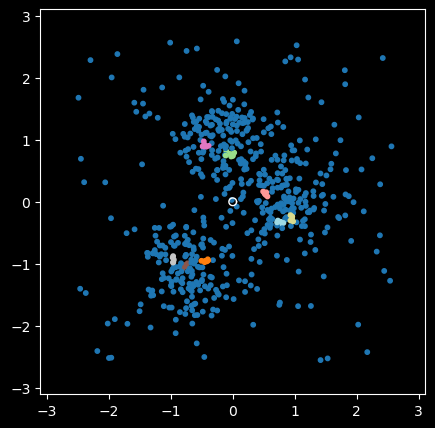

radius: 0.08775360196009457


,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
count,395,36,7,25,7,6,10,5,10,15,9,6,9,5,12,5,4,5,4,5,5,5,5,5


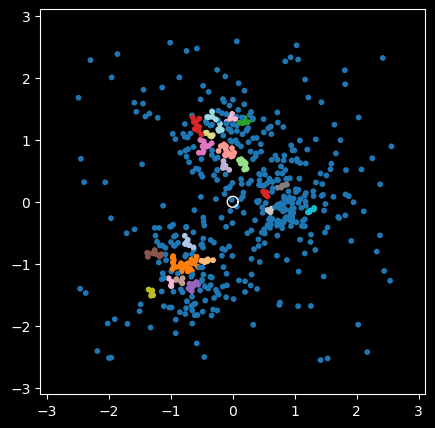

radius: 0.1136714692801261


,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,263,65,52,30,7,48,10,33,29,17,16,5,9,6,5,5


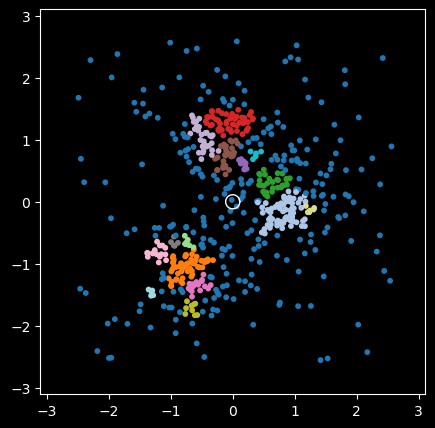

radius: 0.13958933660015765


,-1,0,1,2,3,4,5,6
count,204,127,117,132,5,5,5,5


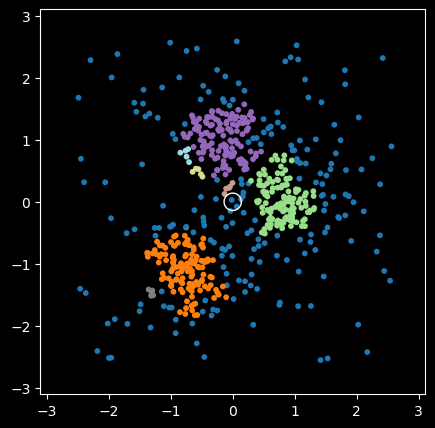

radius: 0.16550720392018917


,-1,0,1,2,3,4,5
count,143,139,298,5,6,5,4


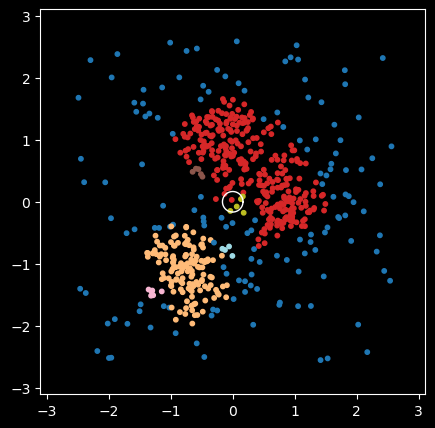

radius: 0.19142507124022068


,-1,0,1,2
count,111,160,323,6


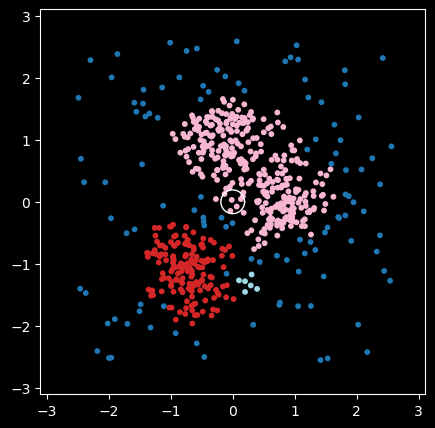

radius: 0.21734293856025222


,-1,0,1,2
count,90,171,333,6


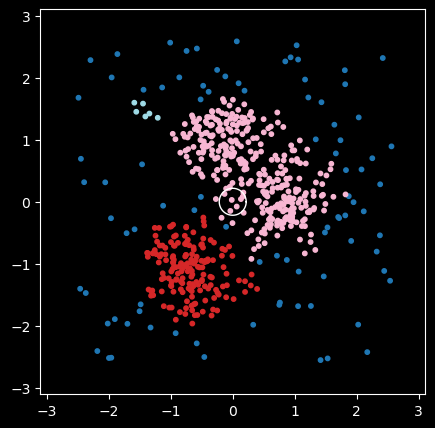

radius: 0.24326080588028376


,-1,0,1,2
count,81,175,337,7


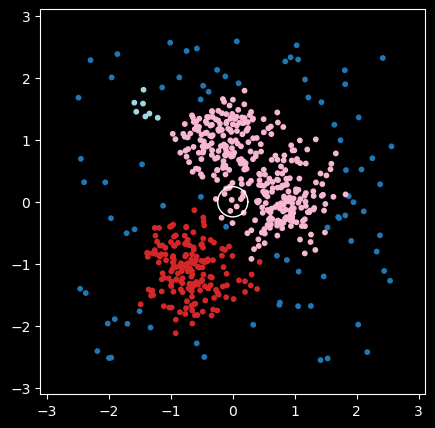

radius: 0.2691786732003153


,-1,0,1,2
count,69,522,2,7


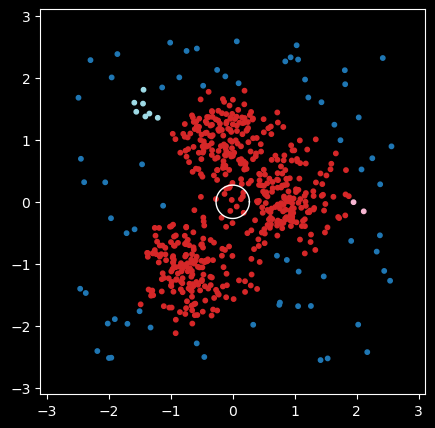

radius: 0.2950965405203468


,-1,0,1,2
count,65,526,2,7


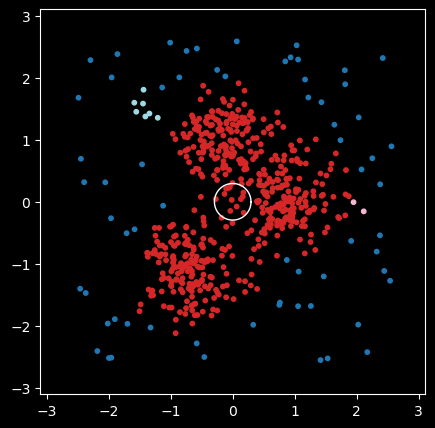

radius: 0.3210144078403783


,-1,0,1
count,59,534,7


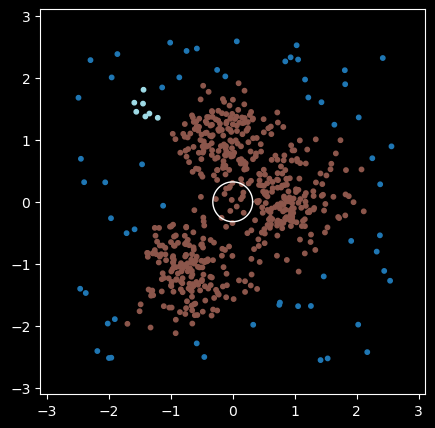

radius: 0.34693227516040986


,-1,0,1,2
count,51,537,5,7


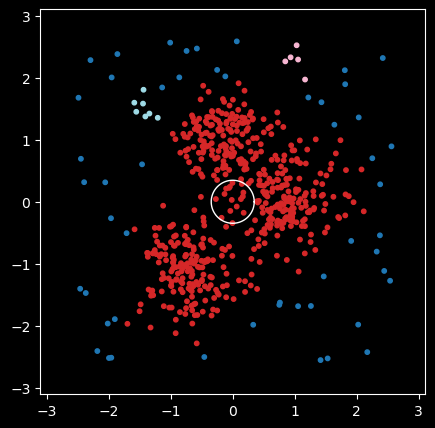

radius: 0.37285014248044135


,-1,0,1
count,49,546,5


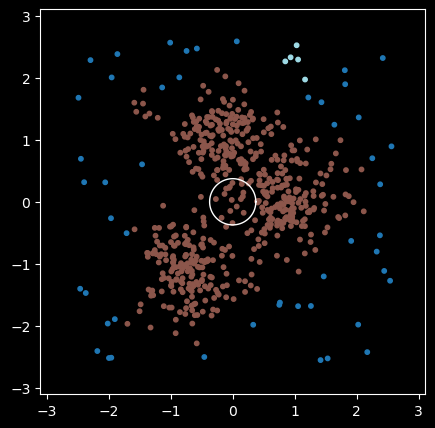

radius: 0.3987680098004729


,-1,0,1
count,44,551,5


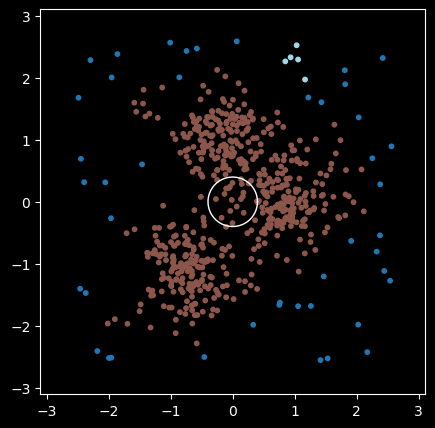

radius: 0.42468587712050443


,-1,0,1
count,39,556,5


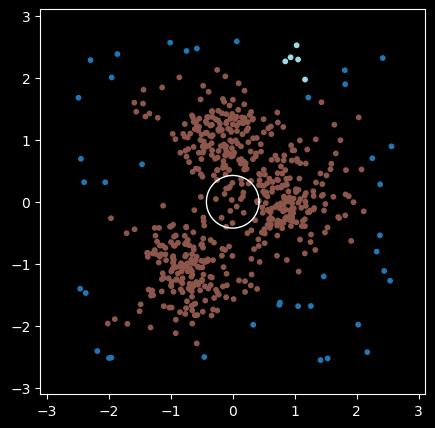

radius: 0.45060374444053597


,-1,0,1
count,34,560,6


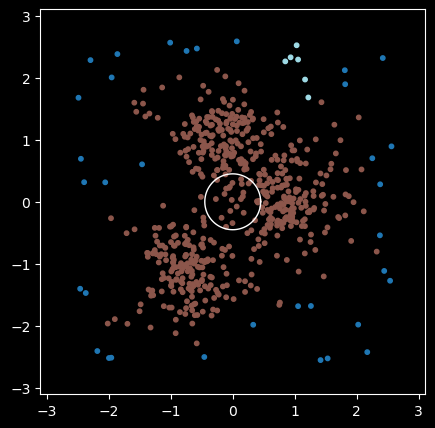

radius: 0.4765216117605675


,-1,0,1
count,28,566,6


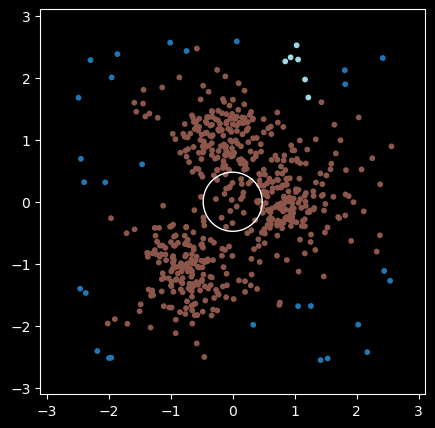

radius: 0.5024394790805989


,-1,0
count,26,574


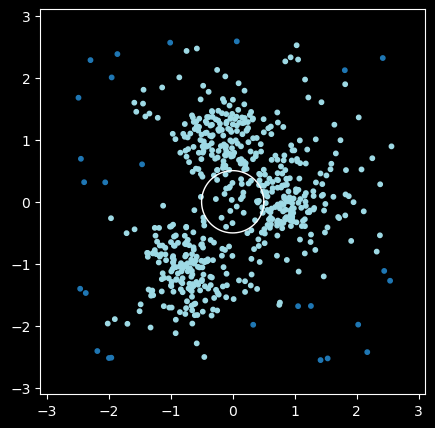

radius: 0.5283573464006306


,-1,0
count,21,579


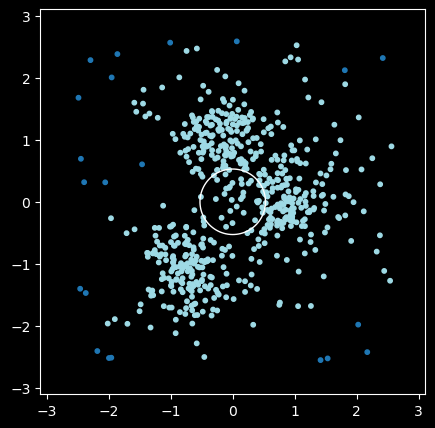

radius: 0.554275213720662


,-1,0
count,15,585


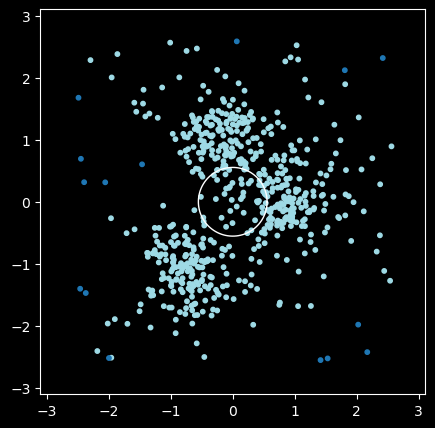

radius: 0.5801930810406936


,-1,0
count,13,587


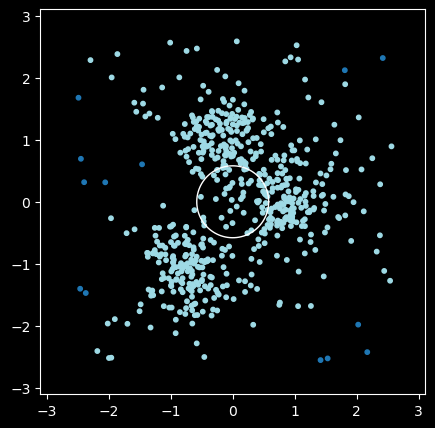

radius: 0.6061109483607251


,-1,0
count,13,587


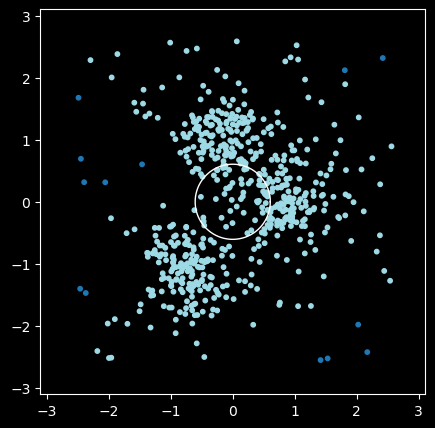

radius: 0.6320288156807566


,-1,0
count,10,590


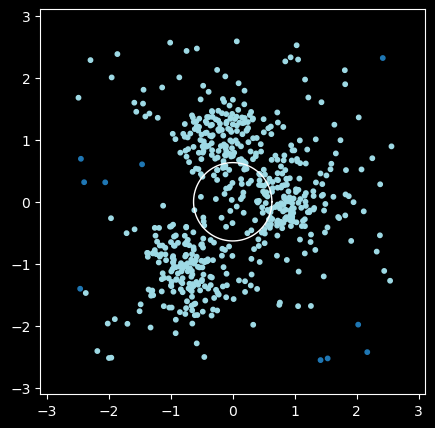

radius: 0.6579466830007882


,-1,0
count,9,591


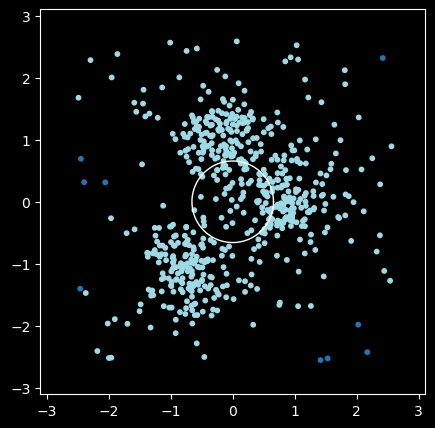

radius: 0.6838645503208197


,-1,0,1
count,5,592,3


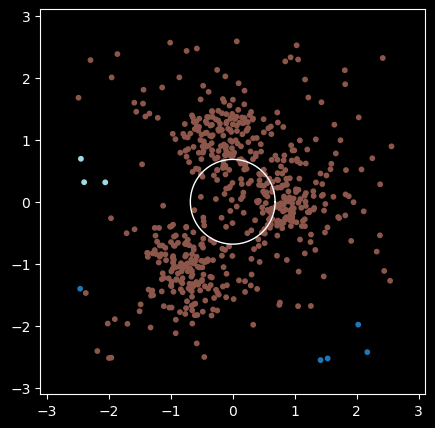

radius: 0.7097824176408513


,-1,0
count,5,595


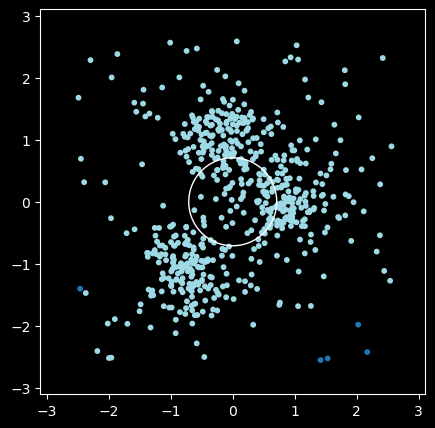

radius: 0.7357002849608827


,-1,0
count,4,596


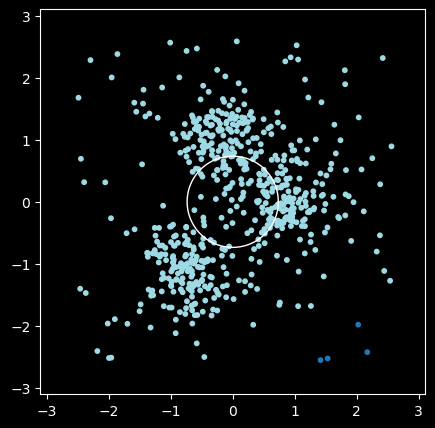

radius: 0.7616181522809142


,-1,0
count,4,596


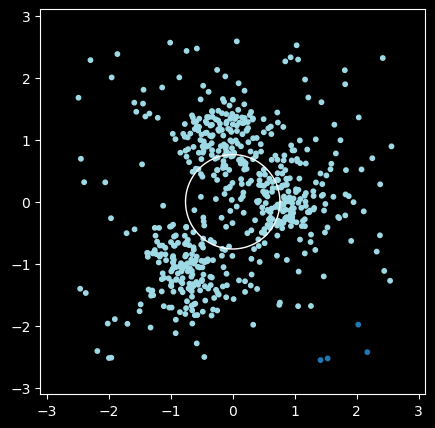

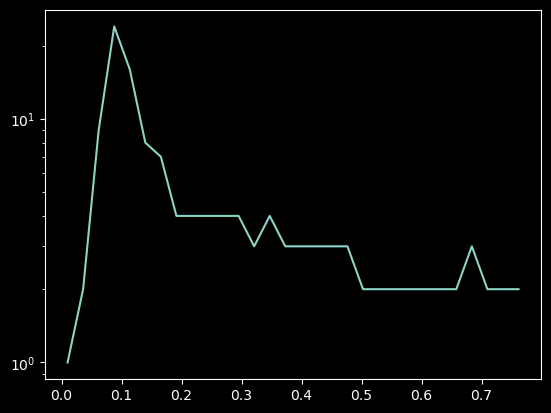

In [63]:
from sklearn.cluster import estimate_bandwidth

radii = np.linspace(
    0.01,
    estimate_bandwidth(X, quantile=0.15),
    30
)

min_samples = 5

n_clusters = []

for r in radii:
    model = DBSCAN(eps=r, min_samples=min_samples)
    labels = model.fit_predict(X)
    labels = pd.Series(labels)
    
    vc = labels.value_counts()

    n_clusters.append( vc.shape[0] )

    # treat outliers as separate classes
    """
    try:
        n_clusters.append( vc.shape[0] - 1 + vc[-1] )
    except:
        n_clusters.append( vc.shape[0] )
    # end
    """
    
    print(f"radius: {r}")
    display(pd.DataFrame(pd.Series(labels).value_counts().sort_index()).T)

    # Plot
    cmap = 'tab20'
    
    plt.figure(figsize=(5,5))
    
    theta = np.linspace(0,2*np.pi,100)
    c = r * np.cos(theta)
    s = r * np.sin(theta)
    
    plt.plot(c, s, linewidth=1, c='w')
    
    plt.scatter(X[:,0], X[:,1], c=labels, s=10, cmap=cmap);
    plt.xlim(-MAX,MAX)
    plt.ylim(-MAX,MAX)
    plt.gca().set_aspect('equal')
    plt.show()
    
# end

plt.semilogy( radii, n_clusters )
plt.show()

0    250
1    250
Name: count, dtype: int64


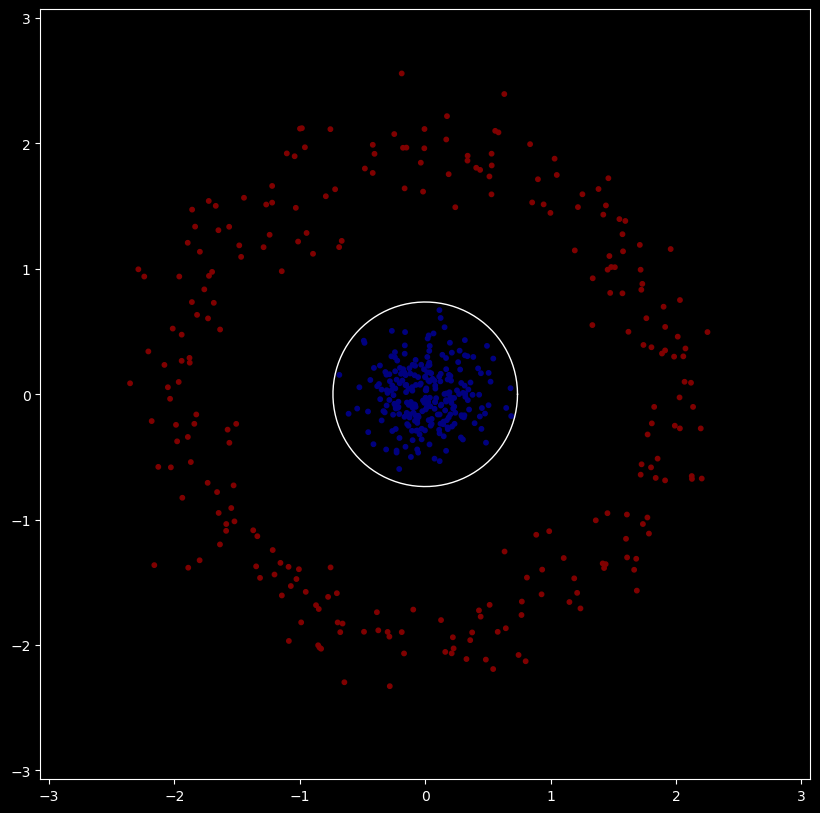

In [10]:
from sklearn.cluster import DBSCAN

# Find clusters
model = DBSCAN(eps=radius, min_samples=5)
labels = model.fit_predict(X)

print(pd.Series(labels).value_counts().sort_index())

# Plot
plt.figure(figsize=(5,5))

theta = np.linspace(0,2*np.pi,100)
c = radius * np.cos(theta)
s = radius * np.sin(theta)

plt.plot(c, s, linewidth=1, c='w')

plt.scatter(X[:,0], X[:,1], c=labels, s=10, cmap=cmap);
plt.xlim(-MAX,MAX)
plt.ylim(-MAX,MAX)
plt.gca().set_aspect('equal')
plt.show()